In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import curdoc
from sklearn import datasets, svm
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import yfinance as yf


# Web Scrapping

In [2]:
a = pd.read_csv("C:/Users/marco/OneDrive/Documentos/Back Up/Cursos Profesionales/Power BI/Products.csv")

In [3]:
a = pd.DataFrame(a)

##### Dataframe FirstLook

In [4]:
a

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442
...,...,...,...,...,...,...,...,...,...,...,...
288,602,5,BB-8107,ML Bottom Bracket,ML Bottom Bracket,Aluminum alloy cups; large diameter spindle.,NaN,0,0,44.9506,101.2400
289,603,5,BB-9108,HL Bottom Bracket,HL Bottom Bracket,Aluminum alloy cups and a hollow axle.,NaN,0,0,53.9416,121.4900
290,604,2,BK-R19B-44,"Road-750 Black, 44",Road-750,Entry level adult bike; offers a comfortable r...,Black,44,U,343.6496,539.9900
291,605,2,BK-R19B-48,"Road-750 Black, 48",Road-750,Entry level adult bike; offers a comfortable r...,Black,48,U,343.6496,539.9900


In [5]:
a.head(5)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442


In [6]:
a.tail(5)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
288,602,5,BB-8107,ML Bottom Bracket,ML Bottom Bracket,Aluminum alloy cups; large diameter spindle.,NaN,0,0,44.9506,101.24
289,603,5,BB-9108,HL Bottom Bracket,HL Bottom Bracket,Aluminum alloy cups and a hollow axle.,NaN,0,0,53.9416,121.49
290,604,2,BK-R19B-44,"Road-750 Black, 44",Road-750,Entry level adult bike; offers a comfortable r...,Black,44,U,343.6496,539.99
291,605,2,BK-R19B-48,"Road-750 Black, 48",Road-750,Entry level adult bike; offers a comfortable r...,Black,48,U,343.6496,539.99
292,606,2,BK-R19B-52,"Road-750 Black, 52",Road-750,Entry level adult bike; offers a comfortable r...,Black,52,U,343.6496,539.99


# Data Analysis

In [7]:
a=a.assign(ProductProfit= lambda x: x.ProductPrice-x.ProductCost)

In [8]:
a.groupby("ProductSubcategoryKey").agg({"ProductProfit": ["min","max"], "ProductPrice":["mean"]}).head(10)

ProductProfit            ProductPrice
                                min        max         mean
ProductSubcategoryKey                                      
1                          245.4103  1487.8356  1637.009169
2                          196.3404  1406.9758  1529.638335
3                          280.9052   902.1321  1425.248182
4                           22.5129    60.7911    68.737050
5                           30.0184    67.5484    92.240000
6                           59.2140    59.2140   106.500000
7                           11.2534    11.2534    20.240000
8                           97.5724   225.1744   278.990000
9                           50.8684    67.5318   106.475000
10                          82.4103   127.5964   184.400000

In [9]:
a.groupby(by="ProductSubcategoryKey").agg({"ProductSize":["min","max"],"ProductProfit": ["mean"],"ProductCost":["count"]})

ProductSize     ProductProfit ProductCost
                              min max          mean       count
ProductSubcategoryKey                                          
1                              38  52    730.795541          32
2                              38  62    596.372505          43
3                              44  62    539.313891          22
4                               0   0     38.217788           8
5                               0   0     51.285400           3
6                               0   0     59.214000           2
7                               0   0     11.253400           1
8                               0   0    155.118400           3
9                               0   0     59.200100           2
10                              0   0    102.526367           3
11                              0   0     48.412767           3
12                             38  52    305.471761          28
13                              0   0     35.594286           7
14                             38  62    283.535274          31
15                              0   0     22.036100           9
16                             44  62    252.945078          18
17                              0   0    122.836686          14
18                              L   S     52.869100           3
19                              0   0      2.939000           1
20                              L   S     18.076800           6
21                              L  XL     14.380300           8
22                              L  XL     38.916786           7
23                              L   M      5.865700           4
24                              L   S     44.056600           3
25                              L   S     39.751000           3
26                              0   0     75.120000           1
27                              0   0     99.534000           1
28                              0   0      5.001700           3
29                              0   0      4.976700           1
30                              0   0     13.759500           1
31                              0   0     21.712167           3
32                             70  70     34.423700           1
33                              0   0     18.402433           3
34                              0   0     14.687500           1
35                              0   0     73.437500           1
36                              0   0     13.212850           2
37                              0   0     12.196155          11

In [10]:
Drop = a[a["ProductSize"] == '0'].index
a.drop(Drop,inplace=True)
a["ProductSize"] == '0'

2      False
3      False
6      False
7      False
8      False
       ...  
285    False
286    False
290    False
291    False
292    False
Name: ProductSize, Length: 209, dtype: bool

In [11]:
a.groupby(by="ProductSubcategoryKey").agg({"ProductSize":["min","max"],"ProductProfit": ["mean"],"ProductCost":["count"]})

ProductSize     ProductProfit ProductCost
                              min max          mean       count
ProductSubcategoryKey                                          
1                              38  52    730.795541          32
2                              38  62    596.372505          43
3                              44  62    539.313891          22
12                             38  52    305.471761          28
14                             38  62    283.535274          31
16                             44  62    252.945078          18
18                              L   S     52.869100           3
20                              L   S     18.076800           6
21                              L  XL     14.380300           8
22                              L  XL     38.916786           7
23                              L   M      5.865700           4
24                              L   S     44.056600           3
25                              L   S     39.751000           3
32                             70  70     34.423700           1

In [12]:
a.sort_values(by="ProductSubcategoryKey",ascending=True,ignore_index=True).agg({"ProductSize":["min","max"],"ProductProfit": ["mean"],"ProductCost":["count"]})

,ProductSize,ProductProfit,ProductCost
min,38,NaN,NaN
max,XL,NaN,NaN
mean,NaN,400.736996,NaN
count,NaN,NaN,209.0


In [13]:
a.ProductColor

2      White
3      White
6      Multi
7      Multi
8      Multi
       ...  
285    Black
286    Black
290    Black
291    Black
292    Black
Name: ProductColor, Length: 209, dtype: object

In [14]:
a.ProductColor.replace(to_replace="Multi", value=np.nan, inplace=True)

In [15]:
a.dropna(inplace= True)

In [16]:
a

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000,6.1037
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000,6.1037
10,238,14,FR-R92R-62,"HL Road Frame - Red, 62",HL Road Frame,Our lightest and best quality aluminum frame m...,Red,62,U,747.9682,1263.4598,515.4916
11,241,14,FR-R92R-44,"HL Road Frame - Red, 44",HL Road Frame,Our lightest and best quality aluminum frame m...,Red,44,U,747.9682,1263.4598,515.4916
12,244,14,FR-R92R-48,"HL Road Frame - Red, 48",HL Road Frame,Our lightest and best quality aluminum frame m...,Red,48,U,747.9682,1263.4598,515.4916
...,...,...,...,...,...,...,...,...,...,...,...,...
285,599,1,BK-M18B-48,"Mountain-500 Black, 48",Mountain-500,"Suitable for any type of riding, on or off-roa...",Black,48,U,294.5797,539.9900,245.4103
286,600,1,BK-M18B-52,"Mountain-500 Black, 52",Mountain-500,"Suitable for any type of riding, on or off-roa...",Black,52,U,294.5797,539.9900,245.4103
290,604,2,BK-R19B-44,"Road-750 Black, 44",Road-750,Entry level adult bike; offers a comfortable r...,Black,44,U,343.6496,539.9900,196.3404
291,605,2,BK-R19B-48,"Road-750 Black, 48",Road-750,Entry level adult bike; offers a comfortable r...,Black,48,U,343.6496,539.9900,196.3404


In [17]:
a.nsmallest(n=10,columns='ProductCost')

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit
167,481,23,SO-R809-M,"Racing Socks, M",Racing Socks,"Thin, lightweight and durable with cuffs that ...",White,M,U,3.3623,8.9900,5.6277
168,482,23,SO-R809-L,"Racing Socks, L",Racing Socks,"Thin, lightweight and durable with cuffs that ...",White,L,U,3.3623,8.9900,5.6277
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000,6.1037
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000,6.1037
151,462,20,GL-H102-S,"Half-Finger Gloves, S",Half-Finger Gloves,"Full padding, improved finger flex, durable pa...",Black,S,U,9.7136,23.5481,13.8345
152,464,20,GL-H102-M,"Half-Finger Gloves, M",Half-Finger Gloves,"Full padding, improved finger flex, durable pa...",Black,M,U,9.7136,23.5481,13.8345
153,466,20,GL-H102-L,"Half-Finger Gloves, L",Half-Finger Gloves,"Full padding, improved finger flex, durable pa...",Black,L,U,9.7136,23.5481,13.8345
154,468,20,GL-F110-S,"Full-Finger Gloves, S",Full-Finger Gloves,"Synthetic palm, flexible knuckles, breathable ...",Black,S,U,15.6709,37.9900,22.3191
155,469,20,GL-F110-M,"Full-Finger Gloves, M",Full-Finger Gloves,"Synthetic palm, flexible knuckles, breathable ...",Black,M,U,15.6709,37.9900,22.3191
156,470,20,GL-F110-L,"Full-Finger Gloves, L",Full-Finger Gloves,"Synthetic palm, flexible knuckles, breathable ...",Black,L,U,15.6709,37.9900,22.3191


In [18]:
a.nlargest(n=10,columns='ProductCost')

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit
42,310,2,BK-R93R-62,"Road-150 Red, 62",Road-150,This bike is ridden by race winners. Developed...,Red,62,U,2171.2942,3578.27,1406.9758
43,311,2,BK-R93R-44,"Road-150 Red, 44",Road-150,This bike is ridden by race winners. Developed...,Red,44,U,2171.2942,3578.27,1406.9758
44,312,2,BK-R93R-48,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,1406.9758
45,313,2,BK-R93R-52,"Road-150 Red, 52",Road-150,This bike is ridden by race winners. Developed...,Red,52,U,2171.2942,3578.27,1406.9758
46,314,2,BK-R93R-56,"Road-150 Red, 56",Road-150,This bike is ridden by race winners. Developed...,Red,56,U,2171.2942,3578.27,1406.9758
64,344,1,BK-M82S-38,"Mountain-100 Silver, 38",Mountain-100,Top-of-the-line competition mountain bike. Per...,Silver,38,U,1912.1544,3399.99,1487.8356
65,345,1,BK-M82S-42,"Mountain-100 Silver, 42",Mountain-100,Top-of-the-line competition mountain bike. Per...,Silver,42,U,1912.1544,3399.99,1487.8356
66,346,1,BK-M82S-44,"Mountain-100 Silver, 44",Mountain-100,Top-of-the-line competition mountain bike. Per...,Silver,44,U,1912.1544,3399.99,1487.8356
67,347,1,BK-M82S-48,"Mountain-100 Silver, 48",Mountain-100,Top-of-the-line competition mountain bike. Per...,Silver,48,U,1912.1544,3399.99,1487.8356
68,348,1,BK-M82B-38,"Mountain-100 Black, 38",Mountain-100,Top-of-the-line competition mountain bike. Per...,Black,38,U,1898.0944,3374.99,1476.8956


In [19]:
Merge1 = pd.read_csv("C:/Users/marco/OneDrive/Documentos/Back Up/Cursos Profesionales/Power BI/Product-Categories.csv")

In [20]:
Merge2 = pd.read_csv("C:/Users/marco/OneDrive/Documentos/Back Up/Cursos Profesionales/Power BI/Product-Subcategories.csv")

In [21]:
df = pd.merge(Merge1,Merge2,how="inner",on="ProductCategoryKey")

In [22]:
df = pd.merge(a,df,how="inner",on="ProductSubcategoryKey")

In [23]:
df

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey,CategoryName,SubcategoryName
0,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000,6.1037,3,Clothing,Socks
1,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000,6.1037,3,Clothing,Socks
2,481,23,SO-R809-M,"Racing Socks, M",Racing Socks,"Thin, lightweight and durable with cuffs that ...",White,M,U,3.3623,8.9900,5.6277,3,Clothing,Socks
3,482,23,SO-R809-L,"Racing Socks, L",Racing Socks,"Thin, lightweight and durable with cuffs that ...",White,L,U,3.3623,8.9900,5.6277,3,Clothing,Socks
4,238,14,FR-R92R-62,"HL Road Frame - Red, 62",HL Road Frame,Our lightest and best quality aluminum frame m...,Red,62,U,747.9682,1263.4598,515.4916,2,Components,Road Frames
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,577,3,BK-T44U-46,"Touring-2000 Blue, 46",Touring-2000,The plush custom saddle keeps you riding all d...,Blue,46,U,755.1508,1214.8500,459.6992,1,Bikes,Touring Bikes
198,578,3,BK-T44U-50,"Touring-2000 Blue, 50",Touring-2000,The plush custom saddle keeps you riding all d...,Blue,50,U,755.1508,1214.8500,459.6992,1,Bikes,Touring Bikes
199,579,3,BK-T44U-54,"Touring-2000 Blue, 54",Touring-2000,The plush custom saddle keeps you riding all d...,Blue,54,U,755.1508,1214.8500,459.6992,1,Bikes,Touring Bikes
200,585,3,BK-T18U-44,"Touring-3000 Blue, 44",Touring-3000,All-occasion value bike with our basic comfort...,Blue,44,U,461.4448,742.3500,280.9052,1,Bikes,Touring Bikes


In [24]:
df.shape

(202, 15)

In [25]:
df.describe()

,ProductKey,ProductSubcategoryKey,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,433.089109,9.262376,582.023436,995.538551,413.515115,1.663366
std,112.948991,7.753380,544.781784,919.639657,379.051427,0.723139
min,218.000000,1.000000,3.362300,8.990000,5.627700,1.000000
25%,332.500000,2.000000,185.819300,333.420000,133.568100,1.000000
50%,449.000000,12.000000,413.146300,699.098200,280.905200,2.000000
75%,530.000000,14.000000,747.968200,1301.363600,574.145800,2.000000
max,606.000000,32.000000,2171.294200,3578.270000,1487.835600,4.000000


In [26]:
df.info

<bound method DataFrame.info of      ProductKey  ProductSubcategoryKey  ProductSKU              ProductName  \
0           218                     23   SO-B909-M   Mountain Bike Socks, M   
1           219                     23   SO-B909-L   Mountain Bike Socks, L   
2           481                     23   SO-R809-M          Racing Socks, M   
3           482                     23   SO-R809-L          Racing Socks, L   
4           238                     14  FR-R92R-62  HL Road Frame - Red, 62   
..          ...                    ...         ...                      ...   
197         577                      3  BK-T44U-46    Touring-2000 Blue, 46   
198         578                      3  BK-T44U-50    Touring-2000 Blue, 50   
199         579                      3  BK-T44U-54    Touring-2000 Blue, 54   
200         585                      3  BK-T18U-44    Touring-3000 Blue, 44   
201         586                      3  BK-T18U-50    Touring-3000 Blue, 50   

               Mode

In [27]:
df.nunique()

ProductKey               202
ProductSubcategoryKey     13
ProductSKU               202
ProductName              202
ModelName                 35
ProductDescription        35
ProductColor               6
ProductSize               18
ProductStyle               4
ProductCost               45
ProductPrice              44
ProductProfit             45
ProductCategoryKey         4
CategoryName               4
SubcategoryName           13
dtype: int64

In [28]:
df.isnull().sum()

ProductKey               0
ProductSubcategoryKey    0
ProductSKU               0
ProductName              0
ModelName                0
ProductDescription       0
ProductColor             0
ProductSize              0
ProductStyle             0
ProductCost              0
ProductPrice             0
ProductProfit            0
ProductCategoryKey       0
CategoryName             0
SubcategoryName          0
dtype: int64

In [29]:
df.drop(columns="ProductColor",inplace=True)

In [30]:
df.sample(10)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey,CategoryName,SubcategoryName
14,266,14,FR-R38R-52,"LL Road Frame - Red, 52",LL Road Frame,"The LL Frame provides a safe comfortable ride,...",52,U,181.4857,306.5636,125.0779,2,Components,Road Frames
190,570,3,BK-T18Y-54,"Touring-3000 Yellow, 54",Touring-3000,All-occasion value bike with our basic comfort...,54,U,461.4448,742.3500,280.9052,1,Bikes,Touring Bikes
105,606,2,BK-R19B-52,"Road-750 Black, 52",Road-750,Entry level adult bike; offers a comfortable r...,52,U,343.6496,539.9900,196.3404,1,Bikes,Road Bikes
55,527,12,FR-M21S-52,"LL Mountain Frame - Silver, 52",LL Mountain Frame,"Our best value utilizing the same, ground-brea...",52,U,144.5938,264.0500,119.4562,2,Components,Mountain Frames
137,600,1,BK-M18B-52,"Mountain-500 Black, 52",Mountain-500,"Suitable for any type of riding, on or off-roa...",52,U,294.5797,539.9900,245.4103,1,Bikes,Mountain Bikes
160,490,21,SJ-0194-L,"Short-Sleeve Classic Jersey, L",Short-Sleeve Classic Jersey,Short sleeve classic breathable jersey with su...,L,U,41.5723,53.9900,12.4177,3,Clothing,Jerseys
99,581,2,BK-R79Y-42,"Road-350-W Yellow, 42",Road-350-W,"Cross-train, race, or just socialize on a slee...",42,W,1082.5100,1700.9900,618.4800,1,Bikes,Road Bikes
122,366,1,BK-M47B-44,"Mountain-300 Black, 44",Mountain-300,For true trail addicts. An extremely durable ...,44,U,598.4354,1079.9900,481.5546,1,Bikes,Mountain Bikes
155,472,25,VE-C304-M,"Classic Vest, M",Classic Vest,"Light-weight, wind-resistant, packs to fit int...",M,U,23.7490,63.5000,39.7510,3,Clothing,Vests
158,488,21,SJ-0194-S,"Short-Sleeve Classic Jersey, S",Short-Sleeve Classic Jersey,Short sleeve classic breathable jersey with su...,S,U,41.5723,53.9900,12.4177,3,Clothing,Jerseys


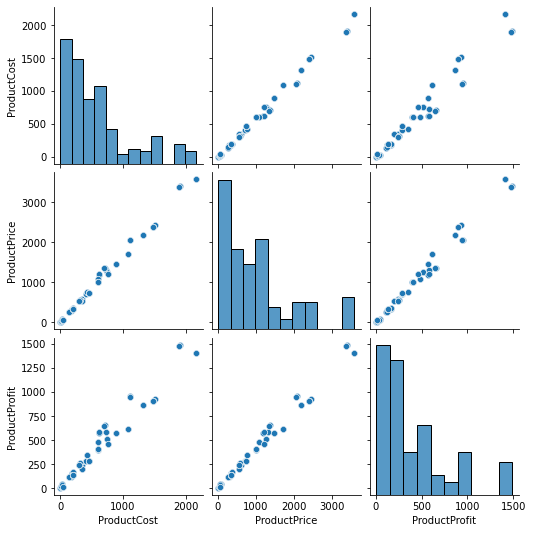

In [31]:
Pairplot=df[['ProductCost','ProductPrice','ProductProfit']]

sns.pairplot(Pairplot)

In [32]:
df.nunique()

ProductKey               202
ProductSubcategoryKey     13
ProductSKU               202
ProductName              202
ModelName                 35
ProductDescription        35
ProductSize               18
ProductStyle               4
ProductCost               45
ProductPrice              44
ProductProfit             45
ProductCategoryKey         4
CategoryName               4
SubcategoryName           13
dtype: int64

In [33]:
df.columns

Index(['ProductKey', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductSize', 'ProductStyle',
       'ProductCost', 'ProductPrice', 'ProductProfit', 'ProductCategoryKey',
       'CategoryName', 'SubcategoryName'],
      dtype='object')

In [34]:
df.nsmallest(n=10,columns="ProductCost")

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey,CategoryName,SubcategoryName
2,481,23,SO-R809-M,"Racing Socks, M",Racing Socks,"Thin, lightweight and durable with cuffs that ...",M,U,3.3623,8.9900,5.6277,3,Clothing,Socks
3,482,23,SO-R809-L,"Racing Socks, L",Racing Socks,"Thin, lightweight and durable with cuffs that ...",L,U,3.3623,8.9900,5.6277,3,Clothing,Socks
0,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,M,U,3.3963,9.5000,6.1037,3,Clothing,Socks
1,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,L,U,3.3963,9.5000,6.1037,3,Clothing,Socks
148,462,20,GL-H102-S,"Half-Finger Gloves, S",Half-Finger Gloves,"Full padding, improved finger flex, durable pa...",S,U,9.7136,23.5481,13.8345,3,Clothing,Gloves
149,464,20,GL-H102-M,"Half-Finger Gloves, M",Half-Finger Gloves,"Full padding, improved finger flex, durable pa...",M,U,9.7136,23.5481,13.8345,3,Clothing,Gloves
150,466,20,GL-H102-L,"Half-Finger Gloves, L",Half-Finger Gloves,"Full padding, improved finger flex, durable pa...",L,U,9.7136,23.5481,13.8345,3,Clothing,Gloves
151,468,20,GL-F110-S,"Full-Finger Gloves, S",Full-Finger Gloves,"Synthetic palm, flexible knuckles, breathable ...",S,U,15.6709,37.9900,22.3191,3,Clothing,Gloves
152,469,20,GL-F110-M,"Full-Finger Gloves, M",Full-Finger Gloves,"Synthetic palm, flexible knuckles, breathable ...",M,U,15.6709,37.9900,22.3191,3,Clothing,Gloves
153,470,20,GL-F110-L,"Full-Finger Gloves, L",Full-Finger Gloves,"Synthetic palm, flexible knuckles, breathable ...",L,U,15.6709,37.9900,22.3191,3,Clothing,Gloves


In [35]:
df.nlargest(n=10,columns="ProductCost")

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey,CategoryName,SubcategoryName
63,310,2,BK-R93R-62,"Road-150 Red, 62",Road-150,This bike is ridden by race winners. Developed...,62,U,2171.2942,3578.27,1406.9758,1,Bikes,Road Bikes
64,311,2,BK-R93R-44,"Road-150 Red, 44",Road-150,This bike is ridden by race winners. Developed...,44,U,2171.2942,3578.27,1406.9758,1,Bikes,Road Bikes
65,312,2,BK-R93R-48,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.27,1406.9758,1,Bikes,Road Bikes
66,313,2,BK-R93R-52,"Road-150 Red, 52",Road-150,This bike is ridden by race winners. Developed...,52,U,2171.2942,3578.27,1406.9758,1,Bikes,Road Bikes
67,314,2,BK-R93R-56,"Road-150 Red, 56",Road-150,This bike is ridden by race winners. Developed...,56,U,2171.2942,3578.27,1406.9758,1,Bikes,Road Bikes
106,344,1,BK-M82S-38,"Mountain-100 Silver, 38",Mountain-100,Top-of-the-line competition mountain bike. Per...,38,U,1912.1544,3399.99,1487.8356,1,Bikes,Mountain Bikes
107,345,1,BK-M82S-42,"Mountain-100 Silver, 42",Mountain-100,Top-of-the-line competition mountain bike. Per...,42,U,1912.1544,3399.99,1487.8356,1,Bikes,Mountain Bikes
108,346,1,BK-M82S-44,"Mountain-100 Silver, 44",Mountain-100,Top-of-the-line competition mountain bike. Per...,44,U,1912.1544,3399.99,1487.8356,1,Bikes,Mountain Bikes
109,347,1,BK-M82S-48,"Mountain-100 Silver, 48",Mountain-100,Top-of-the-line competition mountain bike. Per...,48,U,1912.1544,3399.99,1487.8356,1,Bikes,Mountain Bikes
110,348,1,BK-M82B-38,"Mountain-100 Black, 38",Mountain-100,Top-of-the-line competition mountain bike. Per...,38,U,1898.0944,3374.99,1476.8956,1,Bikes,Mountain Bikes


In [36]:
df.groupby("ProductCategoryKey",as_index=False).agg({"ProductCost":["min","max"],"ProductPrice":["count","mean"],"ProductProfit":["min","max","mean"]})

ProductCategoryKey ProductCost            ProductPrice               \
                             min        max        count         mean   
0                  1    294.5797  2171.2942           97  1541.383524   
1                  2    136.7850   747.9682           77   652.294042   
2                  3      3.3623    41.5723           27    48.257567   
3                  4     20.5663    20.5663            1    54.990000   

  ProductProfit                         
            min        max        mean  
0      196.3404  1487.8356  627.777120  
1      113.0050   657.6890  284.361223  
2        5.6277    44.0566   26.127211  
3       34.4237    34.4237   34.423700

In [37]:
a =df.groupby("ProductCategoryKey").mean()


In [38]:
df.loc[5]

ProductKey                                                             241
ProductSubcategoryKey                                                   14
ProductSKU                                                      FR-R92R-44
ProductName                                        HL Road Frame - Red, 44
ModelName                                                    HL Road Frame
ProductDescription       Our lightest and best quality aluminum frame m...
ProductSize                                                             44
ProductStyle                                                             U
ProductCost                                                       747.9682
ProductPrice                                                     1263.4598
ProductProfit                                                     515.4916
ProductCategoryKey                                                       2
CategoryName                                                    Components
SubcategoryName          

In [39]:
df.iloc[5,0]

241

In [40]:
df.query("ProductCost > 1000")

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey,CategoryName,SubcategoryName
63,310,2,BK-R93R-62,"Road-150 Red, 62",Road-150,This bike is ridden by race winners. Developed...,62,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes
64,311,2,BK-R93R-44,"Road-150 Red, 44",Road-150,This bike is ridden by race winners. Developed...,44,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes
65,312,2,BK-R93R-48,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes
66,313,2,BK-R93R-52,"Road-150 Red, 52",Road-150,This bike is ridden by race winners. Developed...,52,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes
67,314,2,BK-R93R-56,"Road-150 Red, 56",Road-150,This bike is ridden by race winners. Developed...,56,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes
85,368,2,BK-R89R-44,"Road-250 Red, 44",Road-250,"Alluminum-alloy frame provides a light, stiff ...",44,U,1518.7864,2443.3500,924.5636,1,Bikes,Road Bikes
86,369,2,BK-R89R-48,"Road-250 Red, 48",Road-250,"Alluminum-alloy frame provides a light, stiff ...",48,U,1518.7864,2443.3500,924.5636,1,Bikes,Road Bikes
87,370,2,BK-R89R-52,"Road-250 Red, 52",Road-250,"Alluminum-alloy frame provides a light, stiff ...",52,U,1518.7864,2443.3500,924.5636,1,Bikes,Road Bikes
88,371,2,BK-R89R-58,"Road-250 Red, 58",Road-250,"Alluminum-alloy frame provides a light, stiff ...",58,U,1320.6838,2181.5625,860.8787,1,Bikes,Road Bikes
89,373,2,BK-R89B-44,"Road-250 Black, 44",Road-250,"Alluminum-alloy frame provides a light, stiff ...",44,U,1320.6838,2181.5625,860.8787,1,Bikes,Road Bikes


In [41]:
a = (df.query("ProductCost > 1000")
    .assign(StandardRevenue= lambda x: x.ProductCost*100/x.ProductCost.sum(),
            ProfitToCost= lambda x: x.ProductProfit/x.ProductCost))
a

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey,CategoryName,SubcategoryName,StandardRevenue,ProfitToCost
63,310,2,BK-R93R-62,"Road-150 Red, 62",Road-150,This bike is ridden by race winners. Developed...,62,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes,3.611974,0.647989
64,311,2,BK-R93R-44,"Road-150 Red, 44",Road-150,This bike is ridden by race winners. Developed...,44,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes,3.611974,0.647989
65,312,2,BK-R93R-48,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes,3.611974,0.647989
66,313,2,BK-R93R-52,"Road-150 Red, 52",Road-150,This bike is ridden by race winners. Developed...,52,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes,3.611974,0.647989
67,314,2,BK-R93R-56,"Road-150 Red, 56",Road-150,This bike is ridden by race winners. Developed...,56,U,2171.2942,3578.2700,1406.9758,1,Bikes,Road Bikes,3.611974,0.647989
85,368,2,BK-R89R-44,"Road-250 Red, 44",Road-250,"Alluminum-alloy frame provides a light, stiff ...",44,U,1518.7864,2443.3500,924.5636,1,Bikes,Road Bikes,2.526519,0.608752
86,369,2,BK-R89R-48,"Road-250 Red, 48",Road-250,"Alluminum-alloy frame provides a light, stiff ...",48,U,1518.7864,2443.3500,924.5636,1,Bikes,Road Bikes,2.526519,0.608752
87,370,2,BK-R89R-52,"Road-250 Red, 52",Road-250,"Alluminum-alloy frame provides a light, stiff ...",52,U,1518.7864,2443.3500,924.5636,1,Bikes,Road Bikes,2.526519,0.608752
88,371,2,BK-R89R-58,"Road-250 Red, 58",Road-250,"Alluminum-alloy frame provides a light, stiff ...",58,U,1320.6838,2181.5625,860.8787,1,Bikes,Road Bikes,2.196973,0.651843
89,373,2,BK-R89B-44,"Road-250 Black, 44",Road-250,"Alluminum-alloy frame provides a light, stiff ...",44,U,1320.6838,2181.5625,860.8787,1,Bikes,Road Bikes,2.196973,0.651843


In [42]:
df.set_index("ProductCategoryKey")

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductSize,ProductStyle,ProductCost,ProductPrice,ProductProfit,CategoryName,SubcategoryName
ProductCategoryKey,,,,,,,,,,,,,
3,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,M,U,3.3963,9.5000,6.1037,Clothing,Socks
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,L,U,3.3963,9.5000,6.1037,Clothing,Socks
3,481,23,SO-R809-M,"Racing Socks, M",Racing Socks,"Thin, lightweight and durable with cuffs that ...",M,U,3.3623,8.9900,5.6277,Clothing,Socks
3,482,23,SO-R809-L,"Racing Socks, L",Racing Socks,"Thin, lightweight and durable with cuffs that ...",L,U,3.3623,8.9900,5.6277,Clothing,Socks
2,238,14,FR-R92R-62,"HL Road Frame - Red, 62",HL Road Frame,Our lightest and best quality aluminum frame m...,62,U,747.9682,1263.4598,515.4916,Components,Road Frames
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,577,3,BK-T44U-46,"Touring-2000 Blue, 46",Touring-2000,The plush custom saddle keeps you riding all d...,46,U,755.1508,1214.8500,459.6992,Bikes,Touring Bikes
1,578,3,BK-T44U-50,"Touring-2000 Blue, 50",Touring-2000,The plush custom saddle keeps you riding all d...,50,U,755.1508,1214.8500,459.6992,Bikes,Touring Bikes
1,579,3,BK-T44U-54,"Touring-2000 Blue, 54",Touring-2000,The plush custom saddle keeps you riding all d...,54,U,755.1508,1214.8500,459.6992,Bikes,Touring Bikes


In [43]:
df.duplicated("ProductCost")

0      False
1       True
2      False
3       True
4      False
       ...  
197     True
198     True
199     True
200     True
201     True
Length: 202, dtype: bool

In [44]:
df.select_dtypes(include=["float64"])

,ProductCost,ProductPrice,ProductProfit
0,3.3963,9.5000,6.1037
1,3.3963,9.5000,6.1037
2,3.3623,8.9900,5.6277
3,3.3623,8.9900,5.6277
4,747.9682,1263.4598,515.4916
...,...,...,...
197,755.1508,1214.8500,459.6992
198,755.1508,1214.8500,459.6992
199,755.1508,1214.8500,459.6992
200,461.4448,742.3500,280.9052


In [45]:
df.apply(lambda x: [1,2],axis=1)

0      [1, 2]
1      [1, 2]
2      [1, 2]
3      [1, 2]
4      [1, 2]
        ...  
197    [1, 2]
198    [1, 2]
199    [1, 2]
200    [1, 2]
201    [1, 2]
Length: 202, dtype: object

### Data Visualization

##### ProductPrice Plot

In [46]:
ProductPrice=df.groupby("ProductSubcategoryKey",as_index=False).mean()

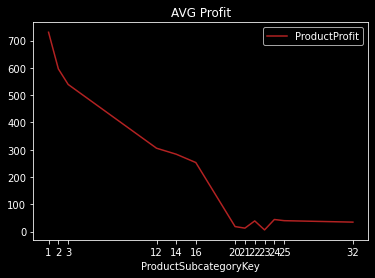

In [47]:
plt.style.use("dark_background")
ProductPrice.plot(x='ProductSubcategoryKey',y='ProductProfit',color='firebrick',title="AVG Profit")
plt.xticks(label='Sub Category Key',ticks=ProductPrice['ProductSubcategoryKey'])
plt.show()

In [48]:
df.groupby("ProductSubcategoryKey").mean()

,ProductKey,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey
ProductSubcategoryKey,,,,,
1,459.156250,906.213628,1637.009169,730.795541,1.0
2,389.511628,933.265830,1529.638335,596.372505,1.0
3,570.954545,885.934291,1425.248182,539.313891,1.0
12,431.392857,338.645957,644.117718,305.471761,2.0
14,313.580645,388.266826,671.802100,283.535274,2.0
16,501.000000,378.470478,631.415556,252.945078,2.0
20,466.500000,12.692250,30.769050,18.076800,3.0
21,489.500000,41.572300,53.990000,12.417700,3.0
22,461.714286,25.358929,64.275714,38.916786,3.0


In [49]:
df.ProductSubcategoryKey.value_counts()

2     43
1     32
14    31
12    28
3     22
16    18
22     7
20     6
21     4
23     4
24     3
25     3
32     1
Name: ProductSubcategoryKey, dtype: int64

##### ProductProfit LinePlot (groupby CategoryName)

In [50]:
final_df=df.groupby("CategoryName",as_index=False).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

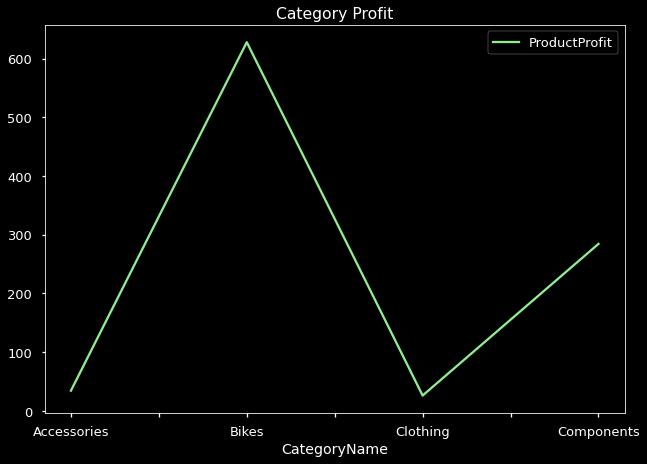

In [51]:
plt.style.use("seaborn-talk")
final_df.plot(x="CategoryName",y="ProductProfit",title="Category Profit",color="lightgreen")

plt.show

In [52]:
final_df

,CategoryName,ProductKey,ProductSubcategoryKey,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey
0,Accessories,487.000000,32.000000,20.566300,54.990000,34.423700,4.0
1,Bikes,453.639175,1.896907,913.606404,1541.383524,627.777120,1.0
2,Clothing,450.962963,22.111111,22.130356,48.257567,26.127211,3.0
3,Components,400.233766,13.740260,367.932818,652.294042,284.361223,2.0


##### Bokeh Dashboard (Profit, Cost, Price). Circles Dash.

In [53]:
final_df_vis=final_df.sort_values(by="ProductProfit",ignore_index=True,ascending=True)

In [54]:
def dash(x,line1,line2,line3,title,file):
    output_file(file)
    curdoc().theme = 'dark_minimal'
    a = figure(title=title,x_axis_label="ProductKey",y_axis_label="Revenue")
    a.circle(x.squeeze(),line1.squeeze(),color="lightgreen",size=20,legend_label="ProductCost")
    a.circle(x.squeeze(),line2.squeeze(),color="firebrick",size=20,legend_label="ProductPrice")
    a.circle(x.squeeze(),line3.squeeze(),color="lightblue",size=20,legend_label="ProductProfit")
    show(a)

In [55]:
dash(final_df['ProductCategoryKey'],final_df['ProductCost'],final_df['ProductPrice'],final_df['ProductProfit'],'Products Revenue','revenue.html')

In [56]:
final_df

,CategoryName,ProductKey,ProductSubcategoryKey,ProductCost,ProductPrice,ProductProfit,ProductCategoryKey
0,Accessories,487.000000,32.000000,20.566300,54.990000,34.423700,4.0
1,Bikes,453.639175,1.896907,913.606404,1541.383524,627.777120,1.0
2,Clothing,450.962963,22.111111,22.130356,48.257567,26.127211,3.0
3,Components,400.233766,13.740260,367.932818,652.294042,284.361223,2.0


##### Scatter Plot (groupby Category Name) Key and Price

<AxesSubplot:xlabel='ProductCategoryKey', ylabel='ProductPrice'>

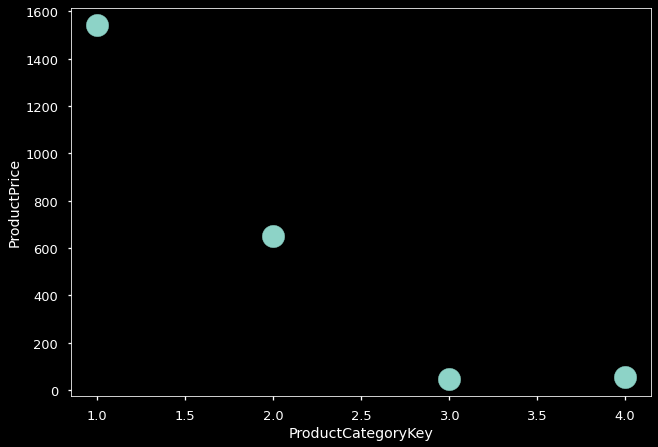

In [57]:
df.groupby("CategoryName",as_index=True).mean().plot(kind='scatter',s=500,x="ProductCategoryKey",y="ProductPrice")

##### ScatterPlot (groupby CategoryKey). Cost and STDRevenue

<AxesSubplot:xlabel='ProfitToCost', ylabel='StandardRevenue'>

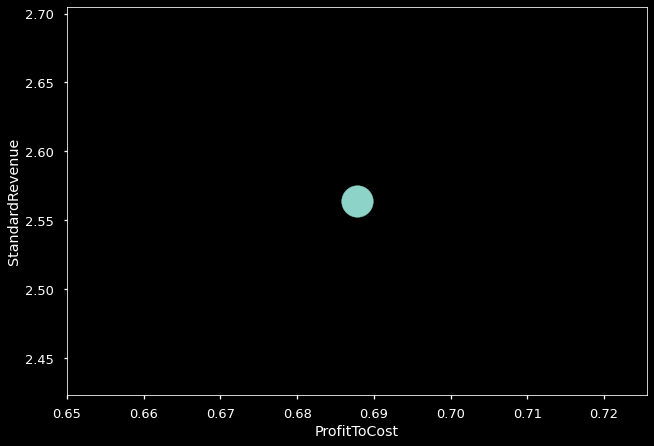

In [58]:
a.groupby("ProductCategoryKey").mean().plot(x="ProfitToCost",y="StandardRevenue",kind="scatter",s=1000)

##### PieChart (groupby CategoryName). ProductPrice

<AxesSubplot:ylabel='ProductPrice'>

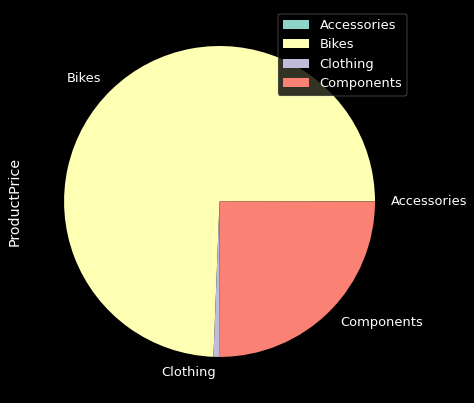

In [59]:
df.groupby("CategoryName").sum().plot(kind="pie",y="ProductPrice")

In [60]:
df.agg({'CategoryName','ProductPrice': ['mean','min','max']})

SyntaxError: invalid syntax (<ipython-input-60-a29a66b6af6c>, line 1)

In [61]:
df.agg({"CategoryName":["min","max"],"ProductPrice": ["min","max"]})

,CategoryName,ProductPrice
min,Accessories,8.99
max,Components,3578.27


# Machine Learning

##### Digits Dataset

In [62]:
digits=datasets.load_digits()

In [63]:
a = digits.images
sample=len(a)
data = digits.images.reshape(sample,-1)

In [64]:
clf = svm.SVC(gamma=0.001)

In [65]:
clf.fit(digits.data[:-1],digits.target[:-1])

SVC(gamma=0.001)

In [66]:
expected=digits.target[sample//2:]
predicted=clf.predict(data[sample//2:])

In [67]:
print("Classification Report %s\n%s\n" % (clf,metrics.classification_report(expected,predicted)))

Classification Report SVC(gamma=0.001)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        86
           3       0.99      1.00      0.99        91
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00        89
           8       1.00      1.00      1.00        88
           9       1.00      0.99      0.99        92

    accuracy                           1.00       899
   macro avg       1.00      1.00      1.00       899
weighted avg       1.00      1.00      1.00       899




In [68]:
print("Confusion Matrix \n%s" % (metrics.confusion_matrix(expected,predicted)))

Confusion Matrix 
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  0]
 [ 0  0 86  0  0  0  0  0  0  0]
 [ 0  0  0 91  0  0  0  0  0  0]
 [ 0  0  0  0 92  0  0  0  0  0]
 [ 0  0  0  0  0 91  0  0  0  0]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  0  0  0  0 91]]


##### Iris Dataset

In [69]:
iris=datasets.load_iris()

In [70]:
sample=len(iris.data)

In [71]:
clf=svm.SVC(gamma=0.001)

In [72]:
data = iris.data.reshape(sample,-1)

In [73]:
clf.fit(iris.data,iris.target)

SVC(gamma=0.001)

In [74]:
expected = iris.target[sample//2:]
predicted= clf.predict(data[sample//2:])

In [75]:
print("Classification Report %s: \n%s" % (clf,metrics.classification_report(expected,predicted)))

Classification Report SVC(gamma=0.001): 
              precision    recall  f1-score   support

           1       0.71      0.96      0.81        25
           2       0.98      0.80      0.88        50

    accuracy                           0.85        75
   macro avg       0.84      0.88      0.85        75
weighted avg       0.89      0.85      0.86        75



In [76]:
print("Confusion Matrix \n%s\n" % (metrics.confusion_matrix(expected,predicted)))

Confusion Matrix 
[[24  1]
 [10 40]]



In [77]:
class table:
    def __init__(self,a,b):
        self.a=a;
        self.b=b;
        self.df=pd.DataFrame();
        
    def tabla(self):
        count = 0;
        a = [];
        b = [];
        c = [];
        for i,j in zip(self.a,self.b):
            count+=1;
            if (i!=j):
                a.append(i);
                b.append(j);
                c.append(count);
        self.df['Expected']=a;
        self.df['Predicted']=b;
        self.df['Position']=c;
        self.df.to_csv("PredictionError1.csv",index=False)

In [78]:
errores = table(expected,predicted)

In [79]:
errores.tabla()

In [80]:
predictedErrors = pd.read_csv("C:/Users/marco/PredictionError1.csv")

In [81]:
predictedErrors

,Expected,Predicted,Position
0,2,1,11
1,2,1,25
2,2,1,34
3,2,1,49
4,2,1,55
5,2,1,56
6,2,1,57
7,2,1,120


In [82]:
def dashboard(x,one,two,title,filename):
    output_file(filename)
    curdoc().theme = 'dark_minimal'
    a = figure(title=title, x_axis_label="Position",y_axis_label="Errors")
    a.circle(x.squeeze(),one.squeeze(),color="green",legend_label="Expected",size=10)
    a.circle(x.squeeze(),two.squeeze(),color="red",legend_label="Predicted",size=10)
    a.xaxis.ticker=x
    show(a)

In [84]:
dashboard(predictedErrors.Position,predictedErrors.Expected,predictedErrors.Predicted,"PredictionsErrors","errors.html")